In [12]:
import StormSwarm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
import pandas as pd
from multiprocessing import Pool
import multiprocessing

###  Let us make control a class, such that we can assign saperate policy for each agent.

In [8]:
ctrl = 0.0
def reward(sim):
    return 0.0
ctrl1 = StormSwarm.controller(0.0,
                   ctrl,
                   0.0,
                   np.linspace(0,1.0,10))
ctrl2 = StormSwarm.controller(0.0,
                   ctrl,
                   0.0,
                   np.linspace(0,1.0,10))
ctrl3 = StormSwarm.controller(0.6,
                   ctrl,
                   0.0,
                   np.linspace(0,1.0,10))
ctrl4 = StormSwarm.controller(0.8,
                   ctrl,
                   0.0,
                   np.linspace(0,1.0,10))
ctrl5 = StormSwarm.controller(1.0,
                   ctrl,
                   0.0,
                   np.linspace(0,1.0,10))

In [9]:
config1 = {"swmm_input"      : "../networks/parallel.inp",
          "state_elements"  : {"state_order" : ["P1", "P2"],
                                        "P1" : "depth",
                                        "P2" : "depth",
                                 "state_len" : 2},
          "control_elements": ["1"],
          "controller"      : ctrl1,
          "reward_function" : reward,
          "timesteps"       : 1}
config2 = {"swmm_input"      : "../networks/parallel.inp",
          "state_elements"  : {"state_order" : ["P1", "P2"],
                                        "P1" : "depth",
                                        "P2" : "depth",
                                 "state_len" : 2},
          "control_elements": ["1"],
          "controller"      : ctrl2,
          "reward_function" : reward,
          "timesteps"       : 1}
config3 = {"swmm_input"      : "../networks/parallel.inp",
          "state_elements"  : {"state_order" : ["P1", "P2"],
                                        "P1" : "depth",
                                        "P2" : "depth",
                                 "state_len" : 2},
          "control_elements": ["1"],
          "controller"      : ctrl3,
          "reward_function" : reward,
          "timesteps"       : 1}
config4 = {"swmm_input"      : "../networks/parallel.inp",
          "state_elements"  : {"state_order" : ["P1", "P2"],
                                        "P1" : "depth",
                                        "P2" : "depth",
                                 "state_len" : 2},
          "control_elements": ["1"],
          "controller"      : ctrl4,
          "reward_function" : reward,
          "timesteps"       : 1}
config5 = {"swmm_input"      : "../networks/parallel.inp",
          "state_elements"  : {"state_order" : ["P1", "P2"],
                                        "P1" : "depth",
                                        "P2" : "depth",
                                 "state_len" : 2},
          "control_elements": ["1"],
          "controller"      : ctrl5,
          "reward_function" : reward,
          "timesteps"       : 1}

In [10]:
with Pool(5) as p:
    data_swarm = p.map(StormSwarm.worker_bee, [config1, config2, config3, config4, config5])

<IPython.core.display.Javascript object>


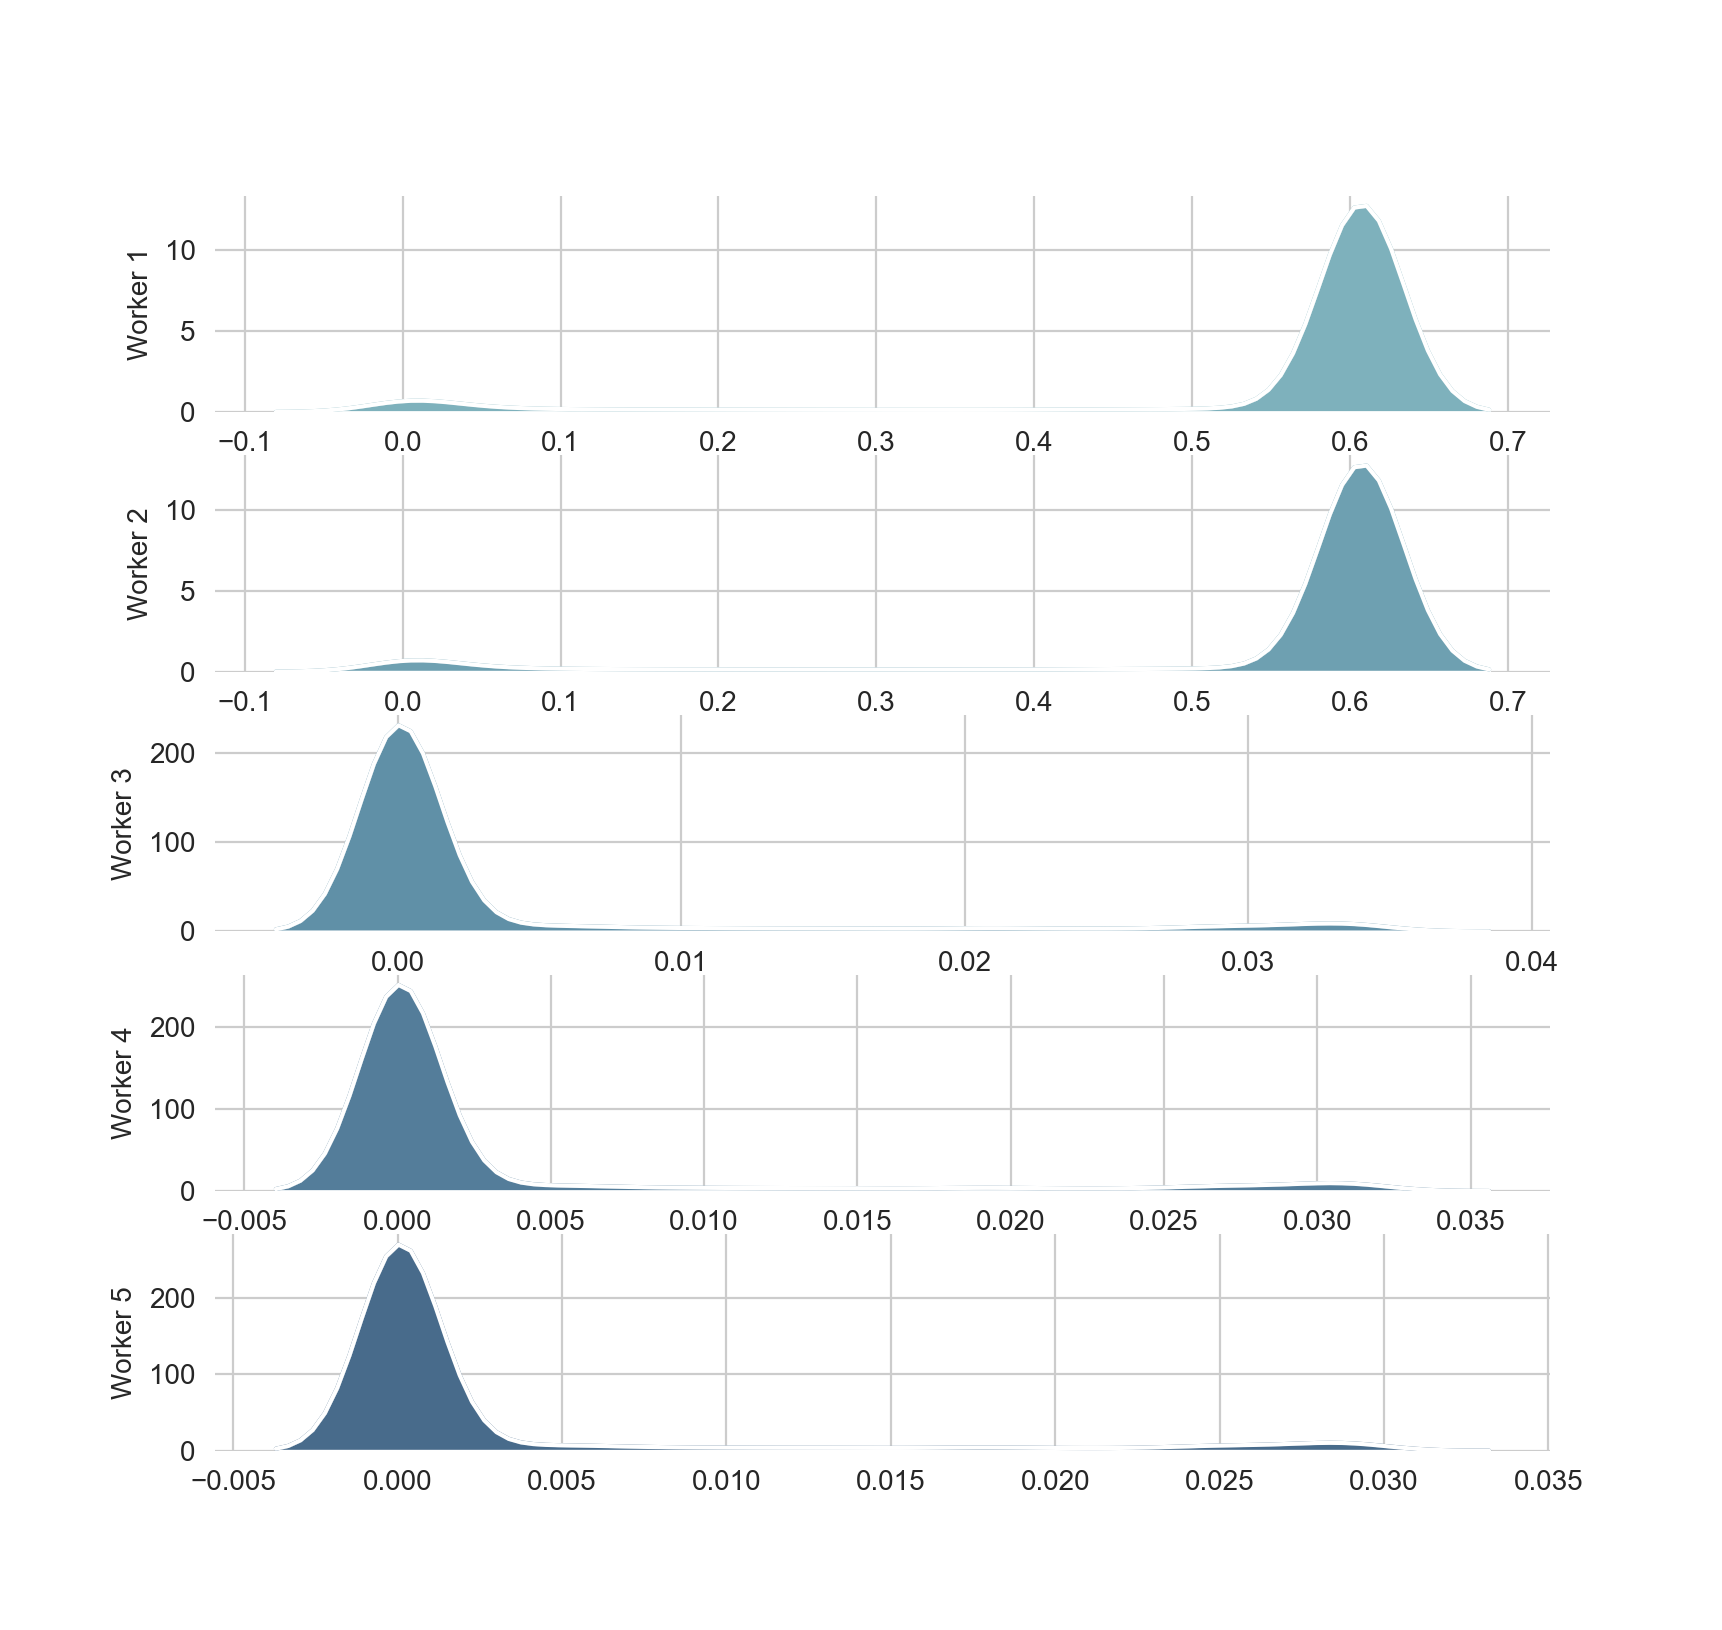

In [13]:
data_plot = {}
for job in range(0, 5):
    data_plot[str(job+1)] = [data_swarm[job]["state"][t][0] for t in range(0, len(data_swarm[job]["state"]))]
    
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
for i in range(0,5):
    plt.subplot(5,1,i+1)
    sns.kdeplot(data_plot[str(i+1)], color=pal[i+1], shade=True, alpha=1.0)
    sns.kdeplot(data_plot[str(i+1)], color="w")
    plt.ylabel("Worker "+str(i+1))
    sns.despine(bottom=True, left=True)